# EDA

In [117]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# import user-defined functions
from data.load import load_data

# remove warnings
warnings.filterwarnings("ignore")

In [157]:
df = load_data(preprocessed=True)

In [119]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,0,1.0,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,1,2.0,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,0,2.0,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,0,0.0,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,0,1.0,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0


### Attrition distribution

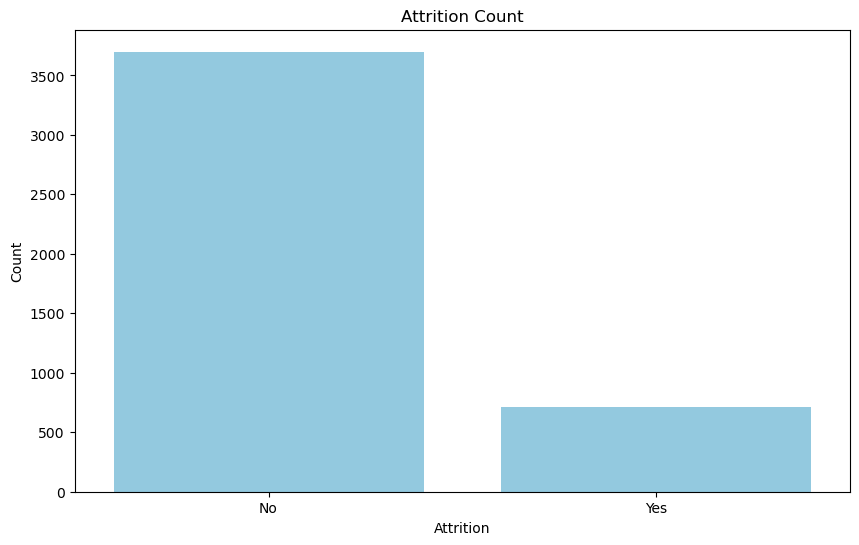

In [225]:
plt.subplots(figsize=(10, 6))
sns.countplot(x='Attrition', data=df, color='skyblue')
plt.title('Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.savefig('../reports/figures/attrition_count.png')
plt.show()

### t-Test for Age and Attrition

In [121]:
# hypothesis testing for the means of ages of Attrition and Non-Attrition using t-test

from scipy.stats import ttest_ind

attrition = df[df['Attrition'] == 1]['Age']
non_attrition = df[df['Attrition'] == 0]['Age']

ttest_ind(attrition, non_attrition)

# print the p-value
print(ttest_ind(attrition, non_attrition).pvalue)

1.9968016158894556e-26


Since the $p$-value is less than 0.05, we can reject the null hypothesis that the average age of employees who left the company is the same as the average age of employees who stayed in the company. In other words, this might indicate there is a significant difference in the average age of employees who left the company and those who stayed in the company.

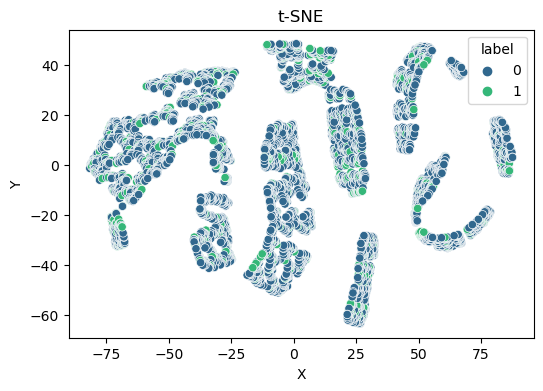

In [122]:
from models.visualization import plot_tsne
from data.preprocessing import one_hot_encode

df = load_data(preprocessed=True)

one_hot_cols = ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
df = one_hot_encode(df, one_hot_cols, drop_first=False)

X = df.drop('Attrition', axis=1)
y = df['Attrition']

plot_tsne(X, y)

### In and Out Time Analysis

In [201]:
df = load_data(preprocessed=True)

in_time = load_data(type='in_time')
out_time = load_data(type='out_time')

# drop columns with all missing values
in_time = in_time.dropna(axis=1, how='all')
out_time = out_time.dropna(axis=1, how='all')

# convert all time columns to datetime
in_time = in_time.apply(pd.to_datetime)
out_time = out_time.apply(pd.to_datetime)

# impute missing values with forward fill and backward fill
in_time = in_time.ffill(axis=1).bfill().dropna(axis=1)
out_time = out_time.ffill(axis=1).bfill().dropna(axis=1)

# find the time spent in the office
time_spent = out_time - in_time
mean_time = time_spent.mean(axis=1)
mean_time = mean_time.apply(lambda x: x.total_seconds()) # change timedelta to seconds

# merge the time spent in the office with the main data
df['time_spent'] = mean_time

In [203]:
df.groupby('Attrition')['time_spent'].mean()

Attrition
0    27699.172817
1    27849.797451
Name: time_spent, dtype: float64

In [206]:
df.groupby('EnvironmentSatisfaction')['time_spent'].mean()

EnvironmentSatisfaction
1.0    28282.456657
2.0    27592.910867
3.0    27652.092135
4.0    27526.660341
Name: time_spent, dtype: float64

In [209]:
df.groupby('JobSatisfaction')['time_spent'].mean()

JobSatisfaction
1.0    27396.811132
2.0    27914.170740
3.0    27820.430826
4.0    27718.005835
Name: time_spent, dtype: float64

In [210]:
df.groupby('WorkLifeBalance')['time_spent'].mean()

WorkLifeBalance
1.0    27260.831358
2.0    27550.445451
3.0    27740.772016
4.0    28252.096925
Name: time_spent, dtype: float64

In [237]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,WorkTimePerDay
0,51,0,1.0,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,26528.321285
1,31,1,2.0,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,27789.967871
2,32,0,2.0,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,25265.803212
3,38,0,0.0,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,25881.192771
4,32,0,1.0,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,28834.811244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,1.0,Research & Development,5,4,Medical,4406,Female,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2,3,3,4.0,1.0,3.0,30687.775100
4406,29,0,1.0,Research & Development,2,4,Medical,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2,2,3,4.0,4.0,3.0,21941.879518
4407,25,0,1.0,Research & Development,25,2,Life Sciences,4408,Male,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2,3,4,1.0,3.0,3.0,27733.554216
4408,42,0,1.0,Sales,18,2,Medical,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,14,1,10.0,2,9,7,8,2,3,4.0,1.0,3.0,34175.469879


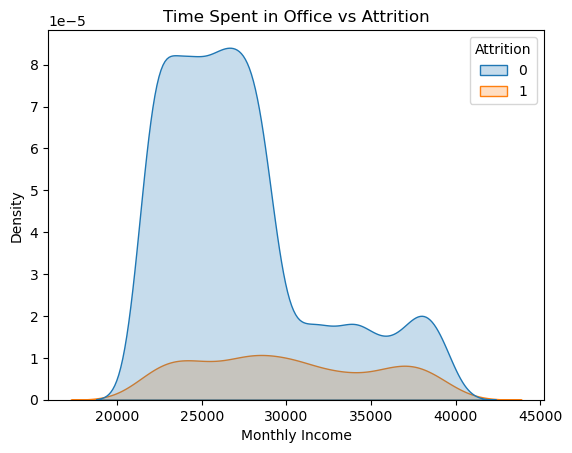

In [242]:
sns.kdeplot(data=df, x='WorkTimePerDay', hue='Attrition',  fill=True)
plt.title('Time Spent in Office vs Attrition')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.savefig('../reports/figures/income.png')
plt.show()

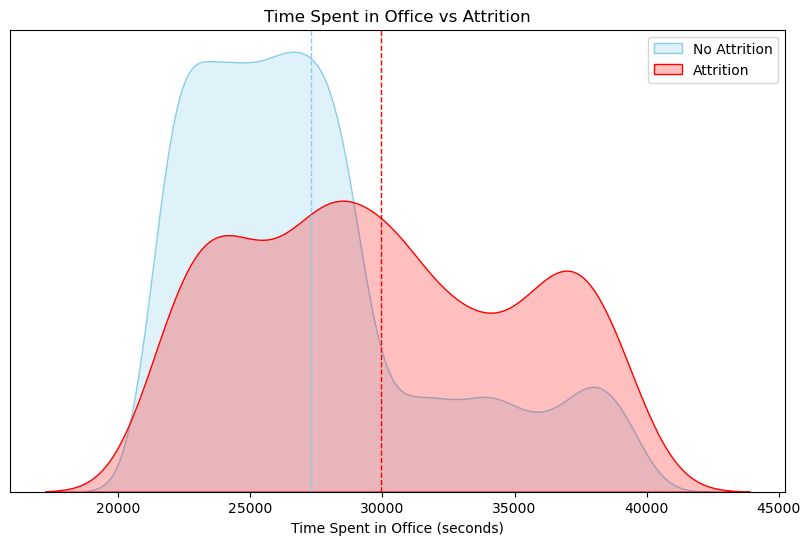

In [271]:
# plotting the mean time spent in the office for Attrition and Non-Attrition in the same plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=df[df['Attrition'] == 0]['WorkTimePerDay'], color='skyblue', label='No Attrition', fill=True, ax=ax)
sns.kdeplot(data=df[df['Attrition'] == 1]['WorkTimePerDay'], color='red', label='Attrition', fill=True, ax=ax)

plt.axvline(df[df['Attrition'] == 0]['WorkTimePerDay'].mean(), color='skyblue', linestyle='dashed', linewidth=1)
plt.axvline(df[df['Attrition'] == 1]['WorkTimePerDay'].mean(), color='red', linestyle='dashed', linewidth=1)

plt.title('Time Spent in Office vs Attrition')
plt.xlabel('Time Spent in Office (seconds)')
plt.ylabel('')
plt.yticks([])
plt.legend()
plt.savefig('../reports/figures/worktimeperday.png')
plt.show()


Text(0.5, 1.0, 'Time Spent in the Office')

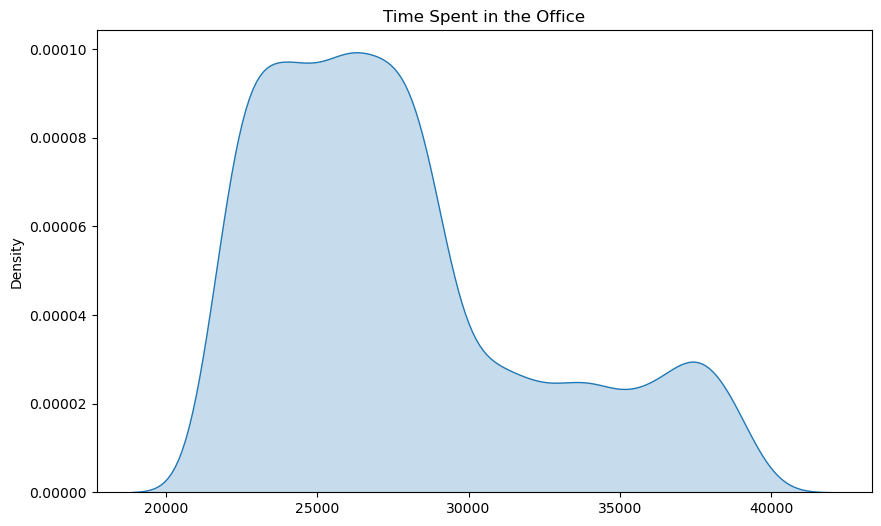

In [154]:
# plot the time spent in the office
plt.subplots(figsize=(10, 6))
sns.kdeplot(mean_time, shade=True)
plt.title('Time Spent in the Office')

In [227]:
df = load_data(preprocessed=True)

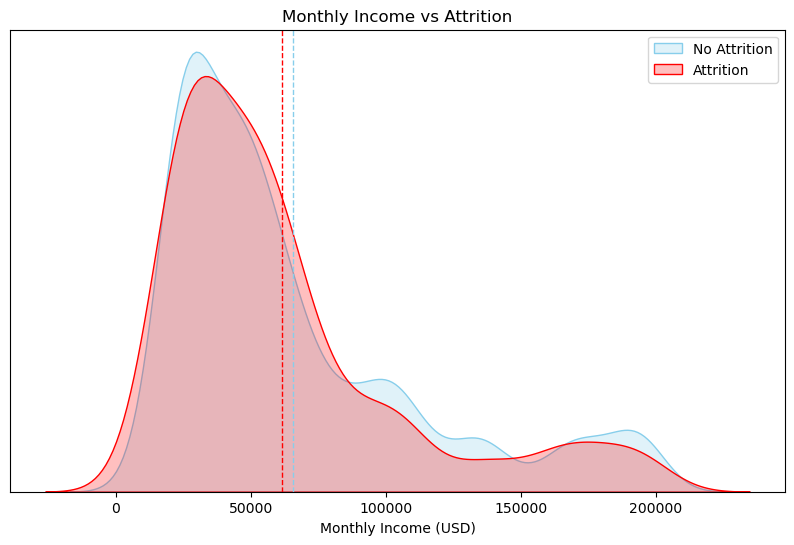

In [272]:
# plotting the mean time spent in the office for Attrition and Non-Attrition in the same plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=df[df['Attrition'] == 0]['MonthlyIncome'], color='skyblue', label='No Attrition', fill=True, ax=ax)
sns.kdeplot(data=df[df['Attrition'] == 1]['MonthlyIncome'], color='red', label='Attrition', fill=True, ax=ax)

plt.axvline(df[df['Attrition'] == 0]['MonthlyIncome'].mean(), color='skyblue', linestyle='dashed', linewidth=1)
plt.axvline(df[df['Attrition'] == 1]['MonthlyIncome'].mean(), color='red', linestyle='dashed', linewidth=1)

plt.title('Monthly Income vs Attrition')
plt.xlabel('Monthly Income (USD)')
plt.ylabel('')
plt.yticks([])
plt.legend()
plt.savefig('../reports/figures/income.png')
plt.show()

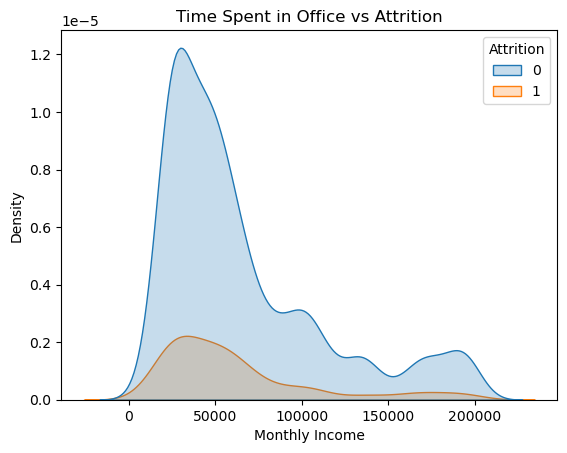

In [232]:
sns.kdeplot(data=df, x='MonthlyIncome', hue='Attrition', fill=True)
plt.title('Time Spent in Office vs Attrition')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.savefig('../reports/figures/income.png')
plt.show()

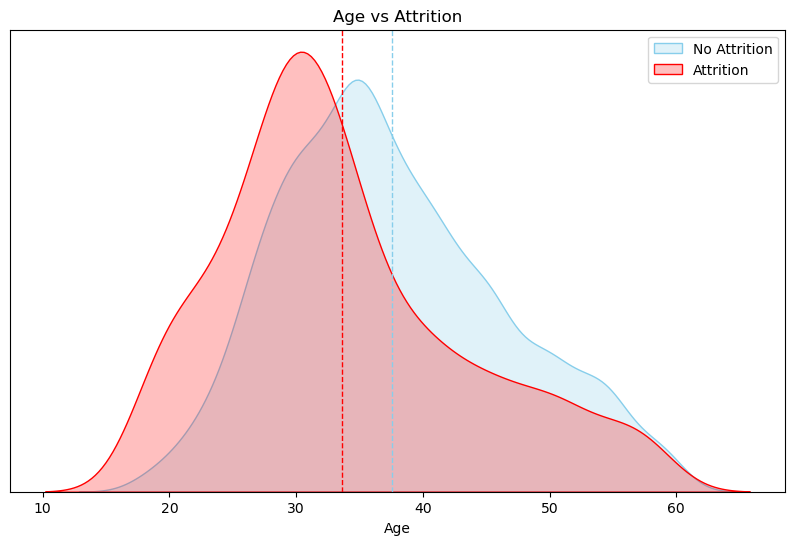

In [273]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=df[df['Attrition'] == 0]['Age'], color='skyblue', label='No Attrition', fill=True, ax=ax)
sns.kdeplot(data=df[df['Attrition'] == 1]['Age'], color='red', label='Attrition', fill=True, ax=ax)

plt.axvline(df[df['Attrition'] == 0]['Age'].mean(), color='skyblue', linestyle='dashed', linewidth=1)
plt.axvline(df[df['Attrition'] == 1]['Age'].mean(), color='red', linestyle='dashed', linewidth=1)

plt.title('Age vs Attrition')
plt.xlabel('Age')
plt.ylabel('')
plt.yticks([])
plt.legend()
plt.savefig('../reports/figures/age.png')
plt.show()

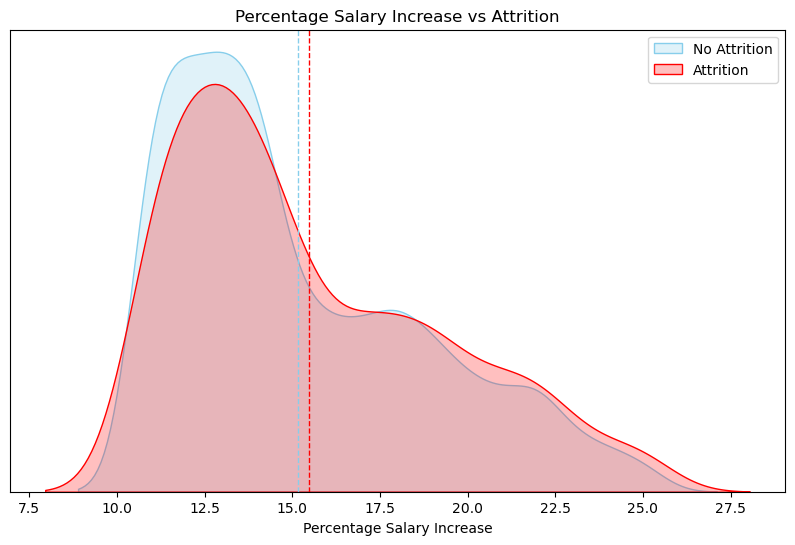

In [274]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=df[df['Attrition'] == 0]['PercentSalaryHike'], color='skyblue', label='No Attrition', fill=True, ax=ax)
sns.kdeplot(data=df[df['Attrition'] == 1]['PercentSalaryHike'], color='red', label='Attrition', fill=True, ax=ax)

plt.axvline(df[df['Attrition'] == 0]['PercentSalaryHike'].mean(), color='skyblue', linestyle='dashed', linewidth=1)
plt.axvline(df[df['Attrition'] == 1]['PercentSalaryHike'].mean(), color='red', linestyle='dashed', linewidth=1)

plt.title('Percentage Salary Increase vs Attrition')
plt.xlabel('Percentage Salary Increase')
plt.ylabel('')
plt.yticks([])
plt.legend()
plt.savefig('../reports/figures/salaryhike.png')
plt.show()

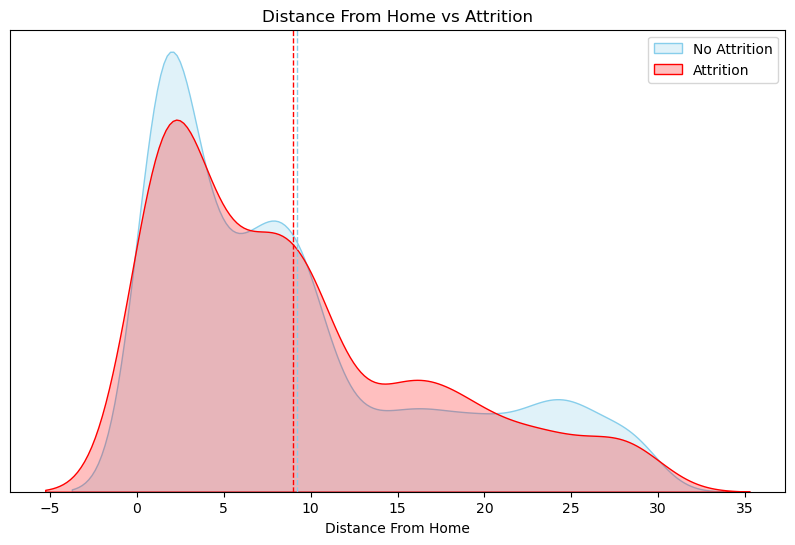

In [275]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=df[df['Attrition'] == 0]['DistanceFromHome'], color='skyblue', label='No Attrition', fill=True, ax=ax)
sns.kdeplot(data=df[df['Attrition'] == 1]['DistanceFromHome'], color='red', label='Attrition', fill=True, ax=ax)

plt.axvline(df[df['Attrition'] == 0]['DistanceFromHome'].mean(), color='skyblue', linestyle='dashed', linewidth=1)
plt.axvline(df[df['Attrition'] == 1]['DistanceFromHome'].mean(), color='red', linestyle='dashed', linewidth=1)

plt.title('Distance From Home vs Attrition')
plt.xlabel('Distance From Home')
plt.ylabel('')
plt.yticks([])
plt.legend()
plt.savefig('../reports/figures/disthome.png')
plt.show()

In [ ]:
TotalWorkingYears

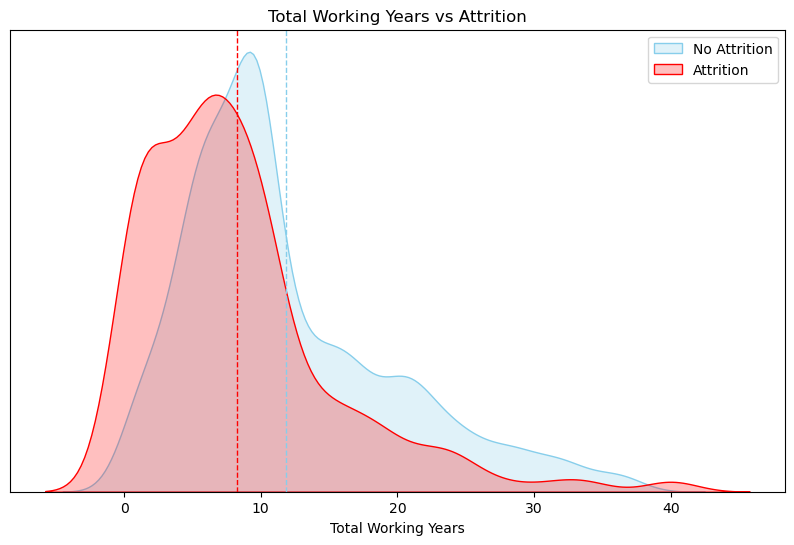

In [276]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.kdeplot(data=df[df['Attrition'] == 0]['TotalWorkingYears'], color='skyblue', label='No Attrition', fill=True, ax=ax)
sns.kdeplot(data=df[df['Attrition'] == 1]['TotalWorkingYears'], color='red', label='Attrition', fill=True, ax=ax)

plt.axvline(df[df['Attrition'] == 0]['TotalWorkingYears'].mean(), color='skyblue', linestyle='dashed', linewidth=1)
plt.axvline(df[df['Attrition'] == 1]['TotalWorkingYears'].mean(), color='red', linestyle='dashed', linewidth=1)

plt.title('Total Working Years vs Attrition')
plt.xlabel('Total Working Years')
plt.ylabel('')
plt.yticks([])
plt.legend()
plt.savefig('../reports/figures/totworkyears.png')
plt.show()